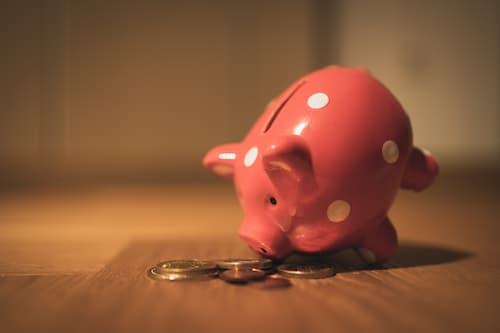

Personal loans are a lucrative revenue stream for banks. The typical interest rate of a two-year loan in the United Kingdom is [around 10%](https://www.experian.com/blogs/ask-experian/whats-a-good-interest-rate-for-a-personal-loan/). This might not sound like a lot, but in September 2022 alone UK consumers borrowed [around £1.5 billion](https://www.ukfinance.org.uk/system/files/2022-12/Household%20Finance%20Review%202022%20Q3-%20Final.pdf), which would mean approximately £300 million in interest generated by banks over two years!

You have been asked to work with a bank to clean the data they collected as part of a recent marketing campaign, which aimed to get customers to take out a personal loan. They plan to conduct more marketing campaigns going forward so would like you to ensure it conforms to the specific structure and data types that they specify so that they can then use the cleaned data you provide to set up a PostgreSQL database, which will store this campaign's data and allow data from future campaigns to be easily imported. 

They have supplied you with a csv file called `"bank_marketing.csv"`, which you will need to clean, reformat, and split the data, saving three final csv files. Specifically, the three files should have the names and contents as outlined below:

## `client.csv`

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `age` | `integer` | Client's age in years | N/A |
| `job` | `object` | Client's type of job | Change `"."` to `"_"` |
| `marital` | `object` | Client's marital status | N/A |
| `education` | `object` | Client's level of education | Change `"."` to `"_"` and `"unknown"` to `np.NaN` |
| `credit_default` | `bool` | Whether the client's credit is in default | Convert to `boolean` data type:<br> `1` if `"yes"`, otherwise `0` |
| `mortgage` | `bool` | Whether the client has an existing mortgage (housing loan) | Convert to boolean data type:<br> `1` if `"yes"`, otherwise `0` |

<br>

## `campaign.csv`

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `number_contacts` | `integer` | Number of contact attempts to the client in the current campaign | N/A |
| `contact_duration` | `integer` | Last contact duration in seconds | N/A |
| `previous_campaign_contacts` | `integer` | Number of contact attempts to the client in the previous campaign | N/A |
| `previous_outcome` | `bool` | Outcome of the previous campaign | Convert to boolean data type:<br> `1` if `"success"`, otherwise `0`. |
| `campaign_outcome` | `bool` | Outcome of the current campaign | Convert to boolean data type:<br> `1` if `"yes"`, otherwise `0`. |
| `last_contact_date` | `datetime` | Last date the client was contacted | Create from a combination of `day`, `month`, and a newly created `year` column (which should have a value of `2022`); <br> **Format =** `"YYYY-MM-DD"` |

<br>

## `economics.csv`

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `cons_price_idx` | `float` | Consumer price index (monthly indicator) | N/A |
| `euribor_three_months` | `float` | Euro Interbank Offered Rate (euribor) three-month rate (daily indicator) | N/A |

#### Import libraries and csv file

In [339]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical operations
import numpy as np

# Defining the file path for the bank marketing data CSV file
bank_marketing_file = 'bank_marketing.csv'

# Reading the CSV file into a pandas DataFrame
bank_marketing_data = pd.read_csv(bank_marketing_file)

# Setting the display width option for pandas to 1000 characters
pd.set_option('display.width', 1000)

- Splitting the dataframe into client, campaign, and economics DataFrames
- Ensure that campaign is a separate DataFrame, not just a view by using .copy()

In [340]:
# Creating a copy of the client-related columns
client = bank_marketing_data[['client_id', 'age', 'job', 'marital', 'education', 'credit_default', 'mortgage']].copy()
# Creating a copy of the campaign-related columns
campaign = bank_marketing_data[['client_id', 'number_contacts', 'contact_duration', 'previous_campaign_contacts', 'previous_outcome', 'campaign_outcome']].copy()
# Creating a copy of the economics-related columns
economics = bank_marketing_data[['client_id', 'cons_price_idx', 'euribor_three_months']].copy()

#### Cleaning the client dataframe

In [341]:
# Replacing dots with underscores in the 'job' column
client['job'] = client['job'].str.replace('.', '_')

# Replacing dots with underscores in the 'education' column
client['education'] = client['education'].str.replace('.', '_')
# Replacing 'unknown' values with NaN in the 'education' column (First we were using .loc() but that changes the client_id data_type)
client['education'] = client['education'].replace('unknown', np.nan)

##### Cleaning the credit_default column

In [ ]:
# Mapping 'yes' to True and 'no' to False in the 'credit_default' column
client['credit_default'] = client['credit_default'].map({'yes' : True, 'no' : False})
# Filling NaN values with False in the 'credit_default' column
client['credit_default'] = client['credit_default'].fillna(False)
# Converting the 'credit_default' column to boolean type
client['credit_default'] = client['credit_default'].astype('boolean')

##### Cleaning the mortgage column

In [ ]:
client['mortgage'] = client['mortgage'].map({'yes': True, 'no': False})  # Mapping 'yes' to True and 'no' to False in the 'mortgage' column
client['mortgage'] = client['mortgage'].fillna(False)  # Filling NaN values with False in the 'mortgage' column
client['mortgage'] = client['mortgage'].astype('boolean')  # Converting the 'mortgage' column to boolean type

#### Cleaning the campaign dataframe

In [344]:
# Mapping 'success' to True, 'failure' and 'nonexistent' to False in the 'previous_outcome' column
campaign['previous_outcome'] = campaign['previous_outcome'].map({'success' : True , 'failure' : False, 'nonexistent' : False})

# Mapping 'yes' to True and 'no' to False in the 'campaign_outcome' column
campaign['campaign_outcome'] = campaign['campaign_outcome'].map({'yes' : True, 'no': False})

#####  Add last_contact_date column

In [ ]:
# Creating a date string by combining 'day', 'month', and a fixed year '2022' (as day was int so change it to str and then use + sign for concat the dataframe column and a sting = 2022)
date = bank_marketing_data['day'].astype(str) + '-' + bank_marketing_data['month'] + '-' + '2022'

# Converting the date string to datetime format, coercing errors to NaT
campaign['last_contact_date'] = pd.to_datetime(date, errors='coerce')

#### Saving the cleaned data into files

In [346]:
client.to_csv('client.csv', index=False)  # Saving the cleaned client DataFrame to 'client.csv' without the index
campaign.to_csv('campaign.csv', index=False)  # Saving the cleaned campaign DataFrame to 'campaign.csv' without the index
economics.to_csv('economics.csv', index=False)  # Saving the economics DataFrame to 'economics.csv' without the index

In [347]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       41188 non-null  int64  
 1   age             41188 non-null  int64  
 2   job             41188 non-null  object 
 3   marital         41188 non-null  object 
 4   education       39457 non-null  object 
 5   credit_default  41188 non-null  boolean
 6   mortgage        41188 non-null  boolean
dtypes: boolean(2), int64(2), object(3)
memory usage: 1.7+ MB


In [348]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   client_id                   41188 non-null  int64         
 1   number_contacts             41188 non-null  int64         
 2   contact_duration            41188 non-null  int64         
 3   previous_campaign_contacts  41188 non-null  int64         
 4   previous_outcome            41188 non-null  bool          
 5   campaign_outcome            41188 non-null  bool          
 6   last_contact_date           41188 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](1), int64(4)
memory usage: 1.6 MB


In [349]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             41188 non-null  int64  
 1   cons_price_idx        41188 non-null  float64
 2   euribor_three_months  41188 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 965.5 KB
